In [14]:
from processing_eeg_methods.data_utils import (
    get_dataset_basic_info,
    get_input_data_path,
    standard_saving_path,
)
from data_loaders import load_data_labels_based_on_dataset
from share import datasets_basic_infos
import numpy as np
import matplotlib.pyplot as plt
from data_utils import train_test_val_split
import mne

# Your initial setup remains the same
dataset_name = "braincommand"
selected_classes = [0, 1, 2, 3]
independent_channels = False
game_mode = "singleplayer"

dataset_info = get_dataset_basic_info(datasets_basic_infos, dataset_name)
dataset_info["#_class"] = len(selected_classes)
data_path = get_input_data_path(dataset_name)



subject_range = range(1, dataset_info['subjects']+1)

In [10]:
epochs_list = []
for subject_id in subject_range:
    print(f"Processing Subject {subject_id}...")
    epochs, data, labels = load_data_labels_based_on_dataset(
        dataset_info,
        subject_id,
        data_path,
        selected_classes=selected_classes,
        normalize=False,
        apply_autoreject=False,
        game_mode=game_mode,
    )
    
    epochs_list.append(epochs)

epochs = mne.concatenate_epochs(epochs_list)

data_train, data_test, _, labels_train, labels_test, _ = train_test_val_split(
        dataX=data, dataY=labels, valid_flag=False)

Processing Subject 1...
Not setting metadata
266 matching events found
Setting baseline interval to [0.0, 1.296] s
Applying baseline correction (mode: mean)
0 projection items activated
Processing Subject 2...
Not setting metadata
247 matching events found
Setting baseline interval to [0.0, 1.296] s
Applying baseline correction (mode: mean)
0 projection items activated
Processing Subject 3...
Not setting metadata
127 matching events found
Setting baseline interval to [0.0, 1.296] s
Applying baseline correction (mode: mean)
0 projection items activated
Processing Subject 4...
Not setting metadata
168 matching events found
Setting baseline interval to [0.0, 1.296] s
Applying baseline correction (mode: mean)
0 projection items activated
Processing Subject 5...
Not setting metadata
132 matching events found
Setting baseline interval to [0.0, 1.296] s
Applying baseline correction (mode: mean)
0 projection items activated
Processing Subject 6...
Not setting metadata
30 matching events found


In [11]:
from collections import defaultdict

def indexes(l, chosen_key):
    _indices = defaultdict(list)
    for index, item in enumerate(l):
        _indices[item].append(index)

    for key, value in _indices.items():
        if key == chosen_key:
            return value
#indexes(labels, 0)

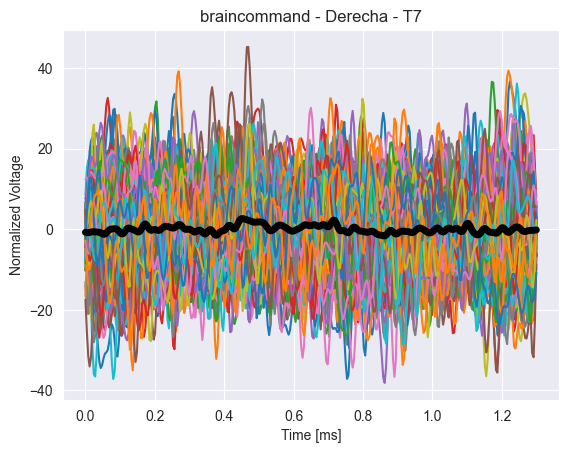

In [16]:
for channel in range(len(dataset_info["channels_names"])):
    for word_index in range(len(dataset_info["target_names"])):
        plt.clf()
        samples_to_time = np.linspace(0, dataset_info["samples"]/dataset_info["sample_rate"], num=dataset_info["samples"])
        indexes_from_word = indexes(labels, word_index)
        for i_index in indexes_from_word:
            plt.plot(samples_to_time, data[i_index,channel,:])
        plt.plot(samples_to_time, np.mean(data[indexes_from_word,channel,:], axis=0), linewidth=5, color='k')
        plt.title(f'{dataset_name} - {dataset_info["target_names"][word_index]} - {dataset_info["channels_names"][channel]}')
        plt.xlabel('Time [ms]')
        plt.ylabel('Normalized Voltage')
        #plt.ylim(0.2, 0.4)
        
        image_save_path = standard_saving_path(
                dataset_info,
                "ERP",
                f"ERP_{dataset_name}_{dataset_info['target_names'][word_index]}_{dataset_info['channels_names'][channel]}",
                file_ending='png',
            )
        
        plt.savefig(image_save_path)

# In case you want to see the XDAWN DENOISING
https://mne.tools/stable/auto_examples/preprocessing/xdawn_denoising.html#sphx-glr-auto-examples-preprocessing-xdawn-denoising-py

In [ ]:
# from mne.preprocessing import Xdawn
# from mne.viz import plot_epochs_image
# 
# plot_epochs_image(epochs)
# # Estimates signal covariance
# signal_cov = mne.compute_covariance(epochs)
# 
# # Xdawn instance
# xd = Xdawn(n_components=2, signal_cov=signal_cov)
# 
# # Fit xdawn
# xd.fit(epochs)
# 
# epochs_denoised = xd.apply(epochs)
# 
# # Plot image epoch after Xdawn
# plot_epochs_image(epochs_denoised['Arriba']) # todo: previously you should had made 'picks' and the event dict only dedicated to one event, otherwise it joins eveything